The main purpose of this document is to introduce how to apply density-based clustering, DBSCAN, and hierarchical-based clustering, Agglomerative/AGNES, implemented by [scikit-learn](https://scikit-learn.org/stable/). We will use a dummy spiral dataset and a generated dummy dataset forming spherical clusters for this document.

# 1. Data preparation

We first import the packages that will be used in this document.

1. [Pandas](https://pandas.pydata.org/): Pandas is an open-source Python library widely used for data manipulation, analysis, and cleaning tasks. The central data structure in Pandas is the [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) which provides methods to facilitate the preliminary examination of essential properties, statistical summaries, and a select number of rows for a cursory exploration of the data.

2. [Numpy](https://numpy.org/): Numpy is a powerful Python library for numerical and array-based computing. It provides support for large, multi-dimensional arrays and matrices, along with a wide range of mathematical functions to operate on these arrays efficiently. 

3. [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html): Make_blobs  is a function provided by scikit-learn, used to generate isotropic Gaussian blobs for clustering.

4. [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html): matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

5. [seaborn](https://seaborn.pydata.org/): Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

6. [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html): DBSCAN is a class provided by scikit-learn, performing DBSCAN clustering from vector array or distance matrix.

7. [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html): It is a module within the SciPy library, providing tools and functions for hierarchical clustering.

8. [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html): AgglomerativeClustering is a class provided by scikit-learn, performing agglomerative clustering.

These packages will be utilized in following tasks for data preparation, clustering, hyperparameter tuning and evaluation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

First, we get the two data sets prepared. We generate a dummy dataset by [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std = 2, random_state=42)

Then we visualize it by [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to gain a concise overview of its distribution.

<AxesSubplot:>

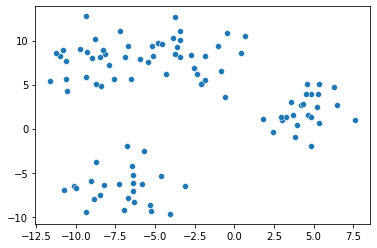

In [3]:
sns.scatterplot(x = X[:, 0],y = X[:, 1])

 And we load the spiral dataset by `pandas.read_csv`, and have a look at the first 5 rows by `head()`.

In [4]:
df = pd.read_csv('spiral2.csv')
df.head()

,x,y,label
0,0.530945,-1.002892,0
1,-0.117648,0.298764,1
2,0.888210,-0.367387,0
3,-0.071591,0.237990,1
4,-0.387418,0.084077,1


Retrieve the features for clustering.

In [5]:
X_spiral = df.iloc[:, :-1].values

Then we visualize it by [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to gain a concise overview of its distribution.

<AxesSubplot:>

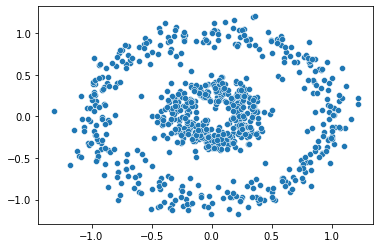

In [6]:
sns.scatterplot(x = X_spiral[:, 0],y = X_spiral[:, 1])

We can observe that the data do not coalesce into spherical clusters.

# 2. Clustering

## 2.1 DBSCAN

For conducting DBSCAN clustering, we use the [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) provided by scikit-learn.

The parameter `eps` represents the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for the data set and distance function. By default, it is set to `0.5`.

The parameter `min_samples` means the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. It is set to `5` by default.

We use [fit_predict()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN.fit_predict) to compute clusters and predict labels. 

First, let's have a look at how the DBSCAN clustering performs on the default values, by visual inspection, using [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) introduced last week.

**For the dataset generated by `make_blobs`:**

<AxesSubplot:>

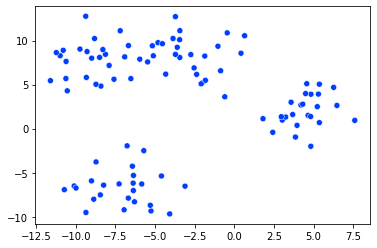

In [7]:
y_pred_default = DBSCAN().fit_predict(X)
unique_values = np.unique(y_pred_default)
num_unique_values = len(unique_values)
colors = sns.color_palette("bright", num_unique_values)
sns.scatterplot(x = X[:, 0],y = X[:, 1], hue = y_pred_default, palette = colors, legend = False)

**For the dummy spiral dataset:**

<AxesSubplot:>

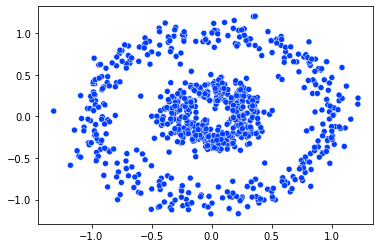

In [8]:
y_pred_default_spiral = DBSCAN().fit_predict(X_spiral)
unique_values_spiral = np.unique(y_pred_default_spiral)
num_unique_values_spiral = len(unique_values_spiral)
colors = sns.color_palette("bright", num_unique_values_spiral)
sns.scatterplot(x = X_spiral[:, 0],y = X_spiral[:, 1], hue = y_pred_default_spiral, palette = colors, legend = False)

We can observe the default hyperparameter values result in poor clustering performance on both data sets.

### 2.1.1 Tuning hyperparameters

Different from the hyperparameters tuning in the classification, we will employ visual inspection for evaluation.

**For the dataset generated by `make_blobs`:**

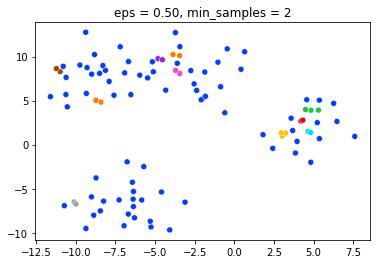

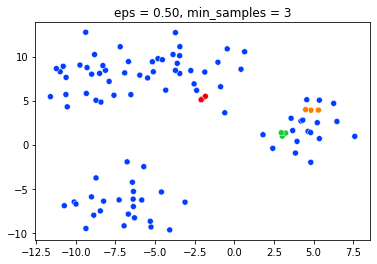

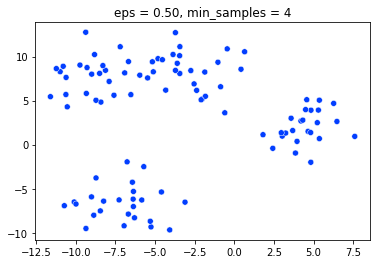

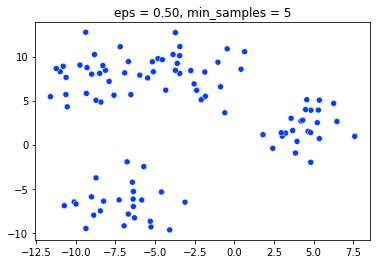

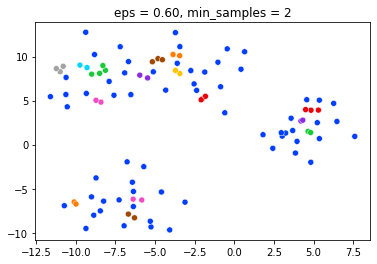

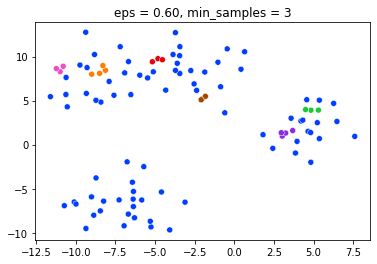

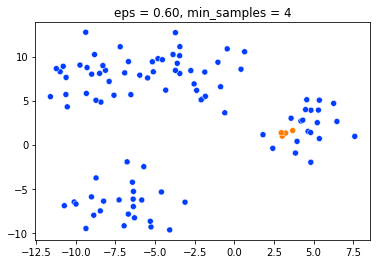

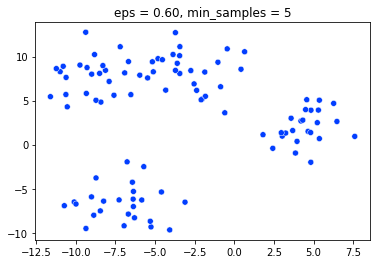

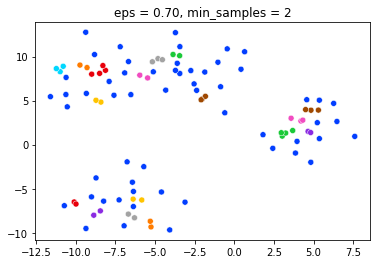

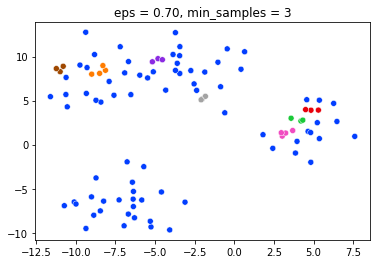

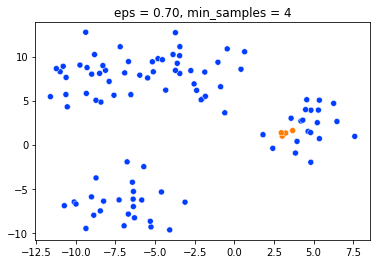

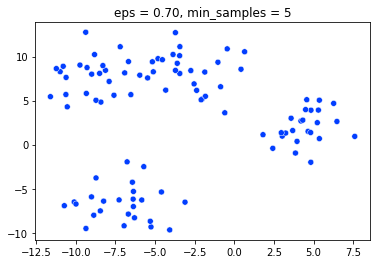

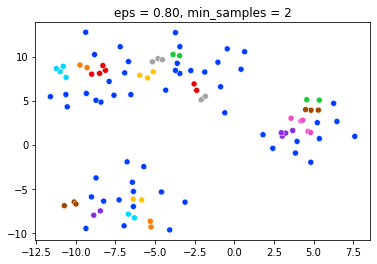

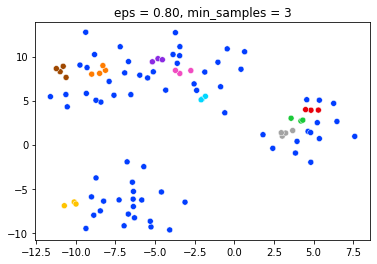

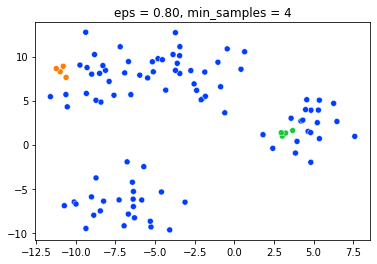

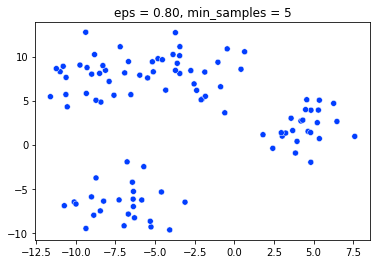

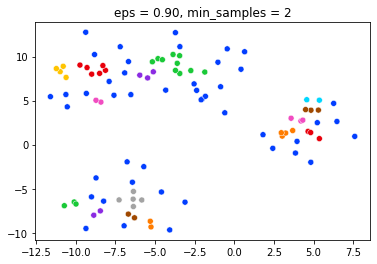

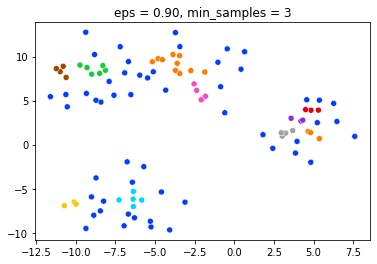

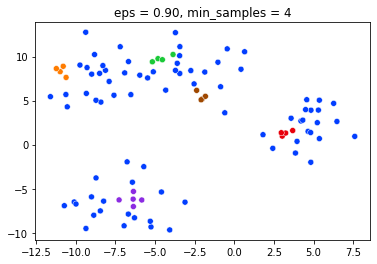

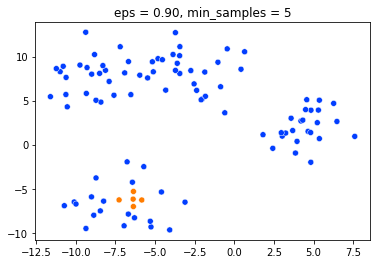

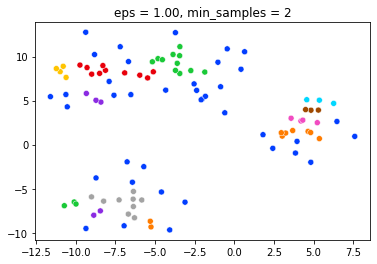

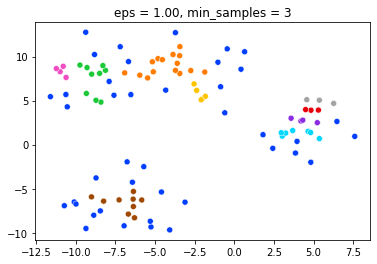

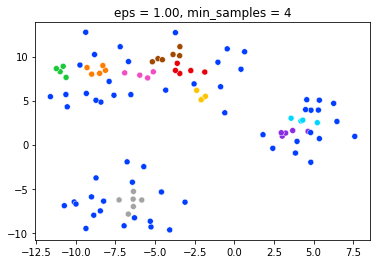

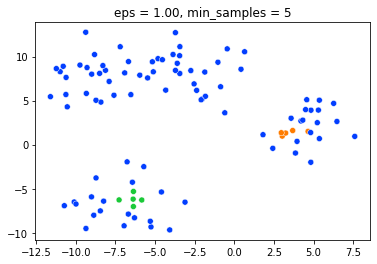

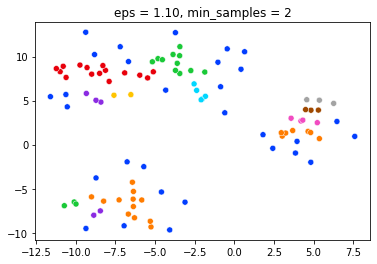

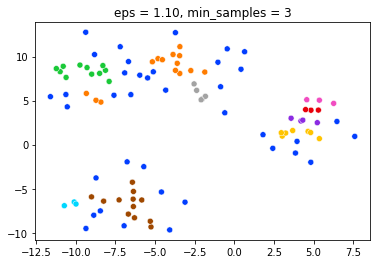

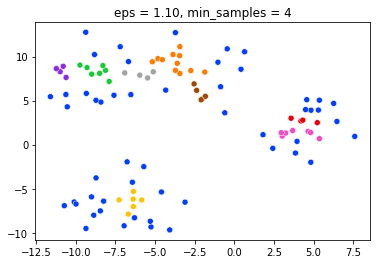

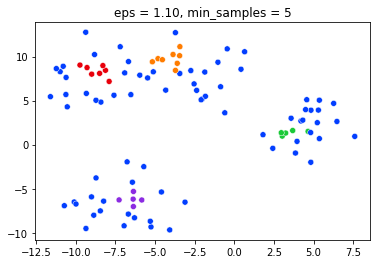

In [9]:
for eps in np.arange(0.5, 1.1, 0.1):
    for min_samples in np.arange(2, 6, 1):
        y_pred = DBSCAN(eps = eps, min_samples = min_samples).fit_predict(X)
        unique_values = np.unique(y_pred)
        num_unique_values = len(unique_values)
        colors = sns.color_palette("bright", num_unique_values)
        plt.figure()
        plt.title("eps = {:.2f}, min_samples = {}".format(eps, min_samples))
        sns.scatterplot(x = X[:,0],y = X[:,1], hue = y_pred, palette = colors, legend = False)
        plt.show()

We can observe the DBSCAN clustering demonstrates poor performance on the dataset due to its spherical and evenly spaced distribution.

**For the dummy spiral dataset:**

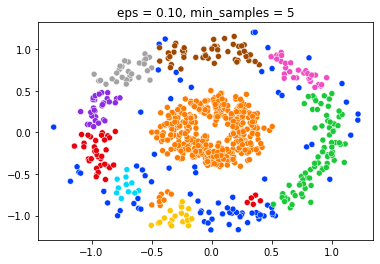

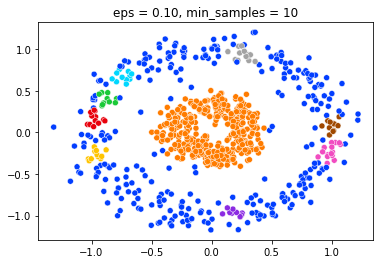

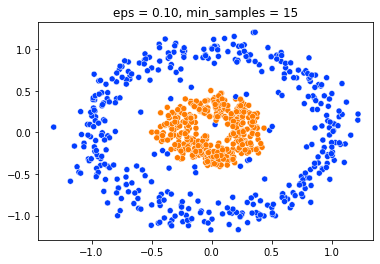

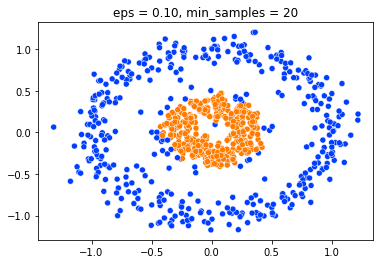

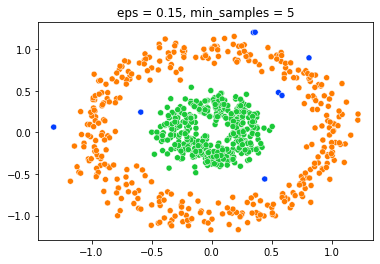

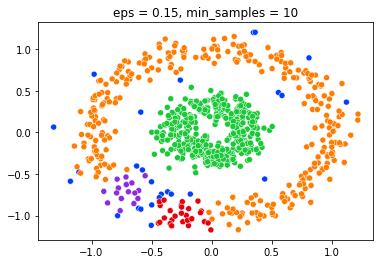

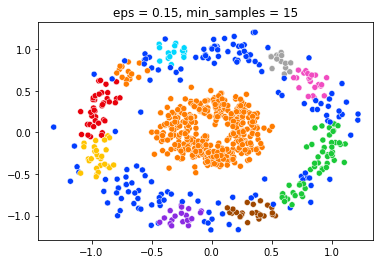

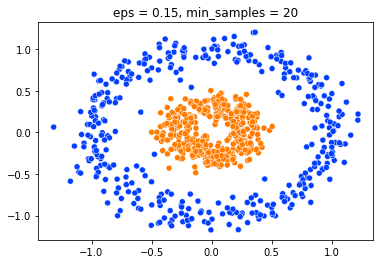

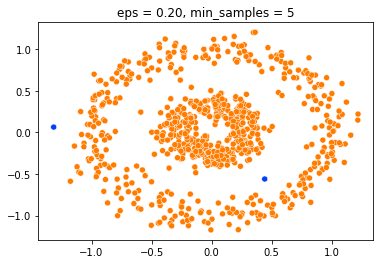

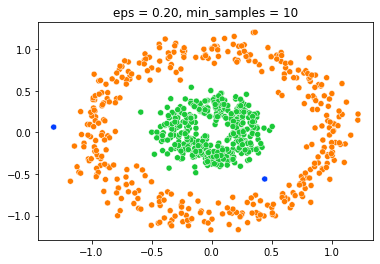

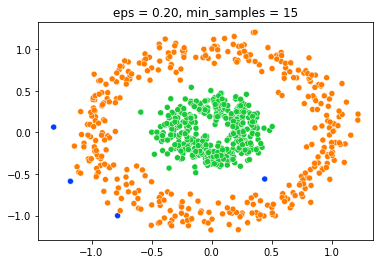

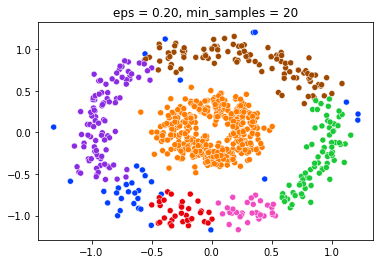

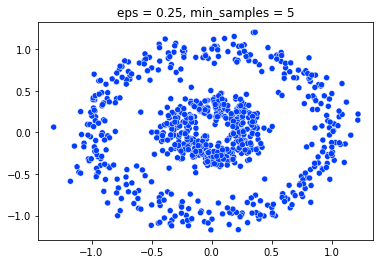

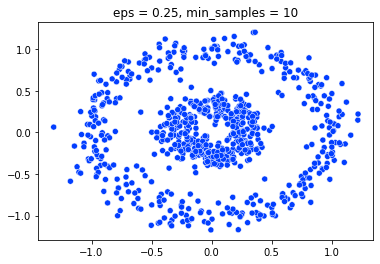

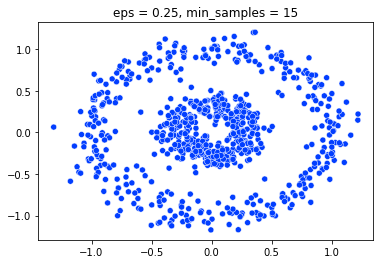

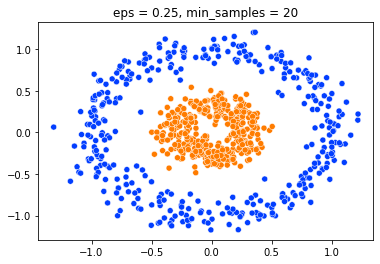

In [10]:
for eps in np.arange(0.1, 0.3, 0.05):
    for min_samples in np.arange(5, 25, 5):
        y_pred_spiral = DBSCAN(eps = eps, min_samples = min_samples).fit_predict(X_spiral)
        unique_values_spiral = np.unique(y_pred_spiral)
        num_unique_values_spiral = len(unique_values_spiral)
        colors_spiral = sns.color_palette("bright", num_unique_values_spiral)
        plt.figure()
        plt.title("eps = {:.2f}, min_samples = {}".format(eps, min_samples))
        sns.scatterplot(x = X_spiral[:,0],y = X_spiral[:,1], hue = y_pred_spiral, palette = colors_spiral, legend = False)
        plt.show()

We can observe that the DBSCAN clustering performs well on the dataset across various `eps` and `min_samples` combinations. For instance, it excels when `eps` is set to 0.2 and `min_samples` is set to 10.

## 2.2 AGNES

For conducting AGNES clustering, we use the [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) provided by scikit-learn.

The parameter `n_clusters` means the number of clusters to find. It is set to `2` by default.

The parameter `linkage` represents which linkage criterion to use. We can choose from `complete`, `average` and `single`, as introduced in the lecture, also known as max, average and min, respectively. 

The parameter `affinity` indicates the metric to use when calculating the distance between instances in a feature array. We will use the default value `euclidean` in this document. You can try others by yourselves.

We use [fit_predict()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering.fit_predict) to fit and return the result of each sample’s clustering assignment.

Let's have a look at how the AGNES clustering performs on the two datasets by visual inspection, using [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

**For the dataset generated by `make_blobs`:**

According to the visual inspection, it should be 4 clusters, so set `n_clusters` to 4.

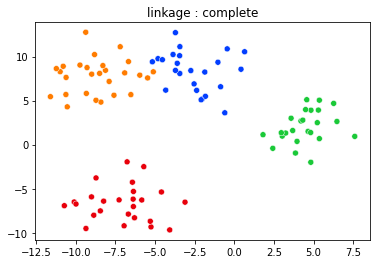

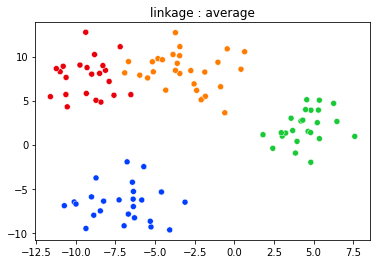

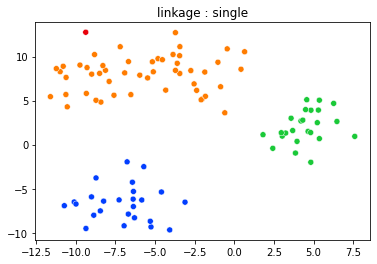

In [11]:
for linkage in ['complete', 'average', 'single']:
    AGNES = AgglomerativeClustering(n_clusters = 4, linkage = linkage)  
    y_predict = AGNES.fit_predict(X)
    plt.figure()
    plt.title("linkage : {}".format(linkage))
    colors = sns.color_palette("bright", 4)
    sns.scatterplot(x = X[:,0],y = X[:,1], hue = y_predict, palette = colors, legend = False)
    plt.show()

We can see AGNES exhibits strong performance on this dataset with complete linkage due to the presence of spherical clusters.

We can generate a dendrogram for the spiral dataset using the [dendrogram()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) function in combination with [linkage()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage).

We utilized the `linkage` parameter `method` with values `complete`, `average`, and `single`, along with the `euclidean` metric.

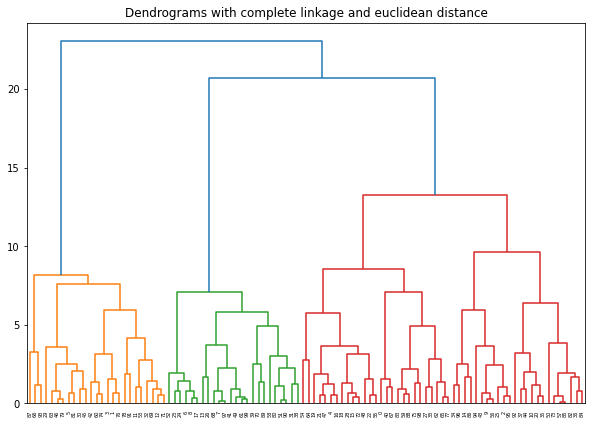

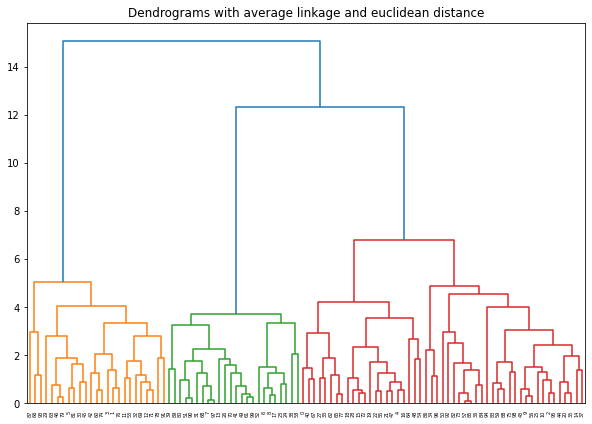

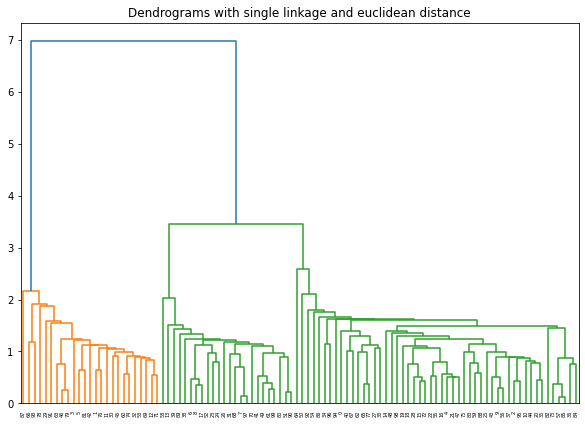

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with complete linkage and euclidean distance") 
dend_max = shc.dendrogram(shc.linkage(X, method='complete', metric='euclidean'))
plt.show()

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with average linkage and euclidean distance") 
dend_avg = shc.dendrogram(shc.linkage(X, method='average', metric='euclidean'))
plt.show()

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with single linkage and euclidean distance") 
dend_min = shc.dendrogram(shc.linkage(X, method='single', metric='euclidean'))
plt.show()

We can cut at a particular level produces corresponding clustering $k$ = 4 by drawing a line on dendrogram with [plt.axhline()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html).

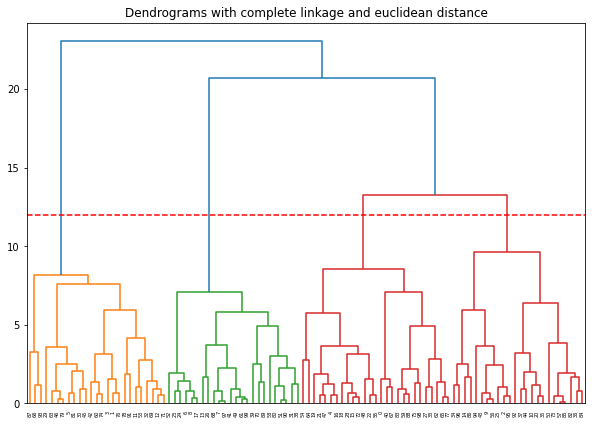

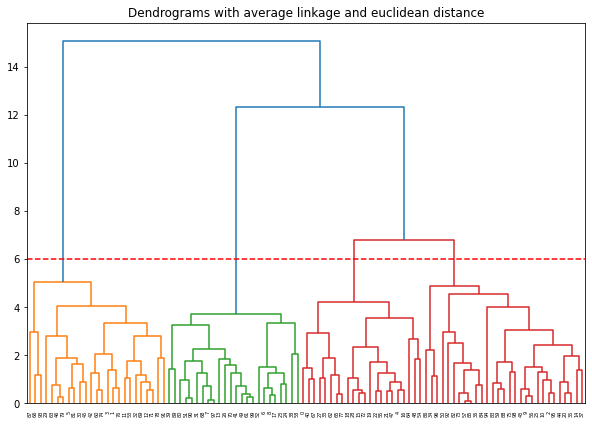

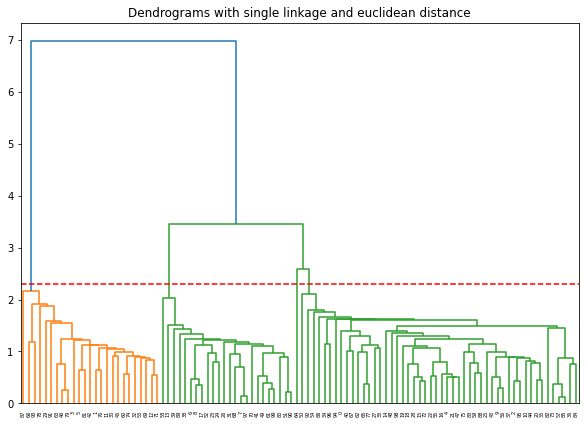

In [13]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with complete linkage and euclidean distance") 
dend_max = shc.dendrogram(shc.linkage(X, method='complete', metric='euclidean'))
plt.axhline(y = 12, color = 'red', linestyle = '--')
plt.show()

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with average linkage and euclidean distance") 
dend_avg = shc.dendrogram(shc.linkage(X, method='average', metric='euclidean'))
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with single linkage and euclidean distance") 
dend_min = shc.dendrogram(shc.linkage(X, method='single', metric='euclidean'))
plt.axhline(y = 2.3, color = 'red', linestyle = '--')
plt.show()

**For the dummy spiral dataset:**

Based on visual inspection, it appears that there should be either 2 or 3 clusters (taking outliers into account). Therefore, it's recommended to experiment with both n_clusters values.

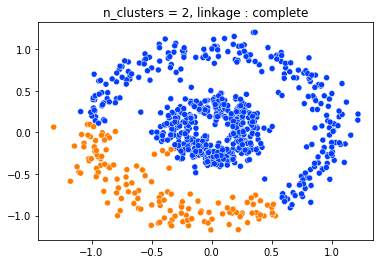

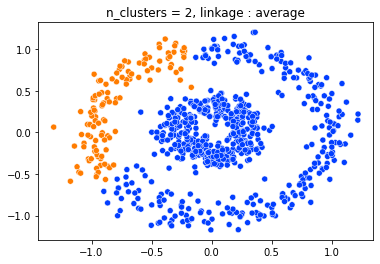

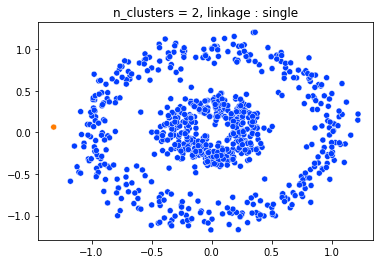

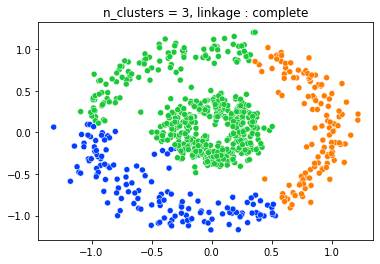

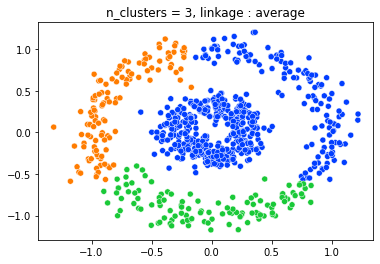

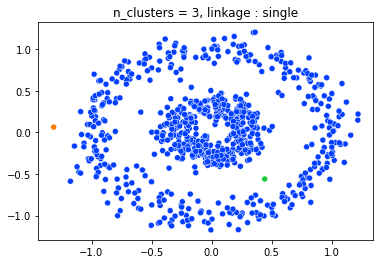

In [14]:
for n_clusters in range(2,4):
    for linkage in ['complete', 'average', 'single']:
        AGNES_spiral = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)  
        y_predict_spiral = AGNES_spiral.fit_predict(X_spiral)
        colors_spiral = sns.color_palette("bright", n_clusters)
        plt.figure()
        plt.title("n_clusters = {}, linkage : {}".format(n_clusters, linkage))
        sns.scatterplot(x = X_spiral[:,0],y = X_spiral[:,1], hue = y_predict_spiral, palette = colors_spiral, legend = False)
        plt.show()

We can observe that AGNES has a poor performance on the spiral dataset due to its distribution.

Likewise, generating a dendrogram from the spiral dataset and performing a cut at a specific level yields the corresponding clustering with $k$ = 3.

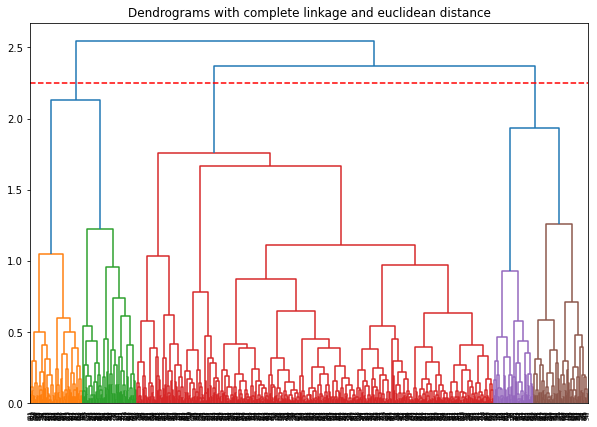

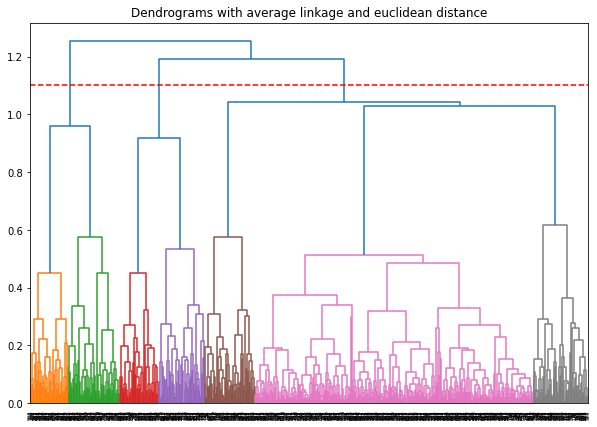

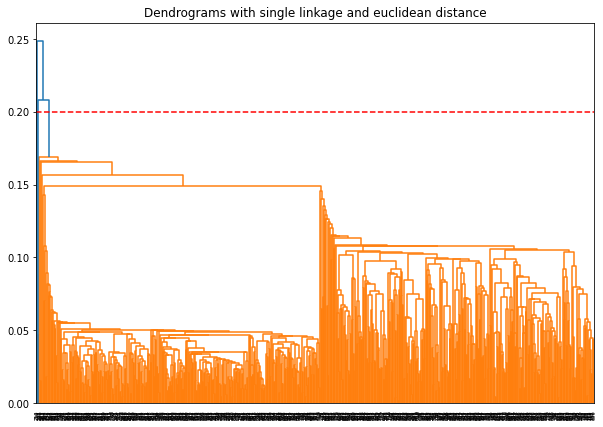

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with complete linkage and euclidean distance") 
dend_max_spiral = shc.dendrogram(shc.linkage(X_spiral, method='complete', metric='euclidean'))
plt.axhline(y = 2.25, color = 'red', linestyle = '--')
plt.show()

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with average linkage and euclidean distance") 
dend_avg_spiral = shc.dendrogram(shc.linkage(X_spiral, method='average', metric='euclidean'))
plt.axhline(y = 1.1, color = 'red', linestyle = '--')
plt.show()

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with single linkage and euclidean distance") 
dend_min_spiral = shc.dendrogram(shc.linkage(X_spiral, method='single', metric='euclidean'))
plt.axhline(y = 0.2, color = 'red', linestyle = '--')
plt.show()

We have also provided the dataset used in lectures in <em>**data_hir.csv**</em> for you to play with, whose clustering on three different linkages are shown below.

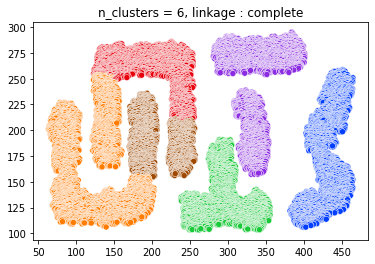

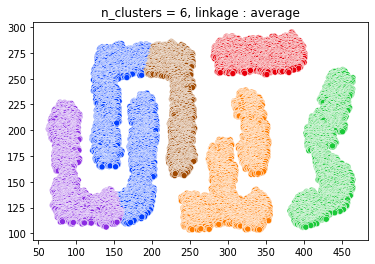

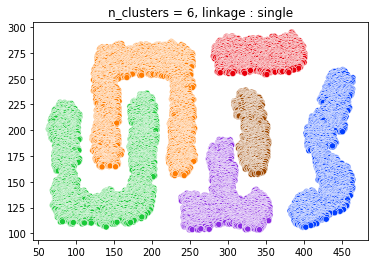

In [16]:
df_hir = pd.read_csv('data_hir.csv')
X_hir = df_hir.values

n_clusters = 6

for linkage in ['complete', 'average', 'single']:
        AGNES_hir = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)  
        y_predict_hir = AGNES_hir.fit_predict(X_hir)
        colors_hir = sns.color_palette("bright", n_clusters)
        plt.figure()
        plt.title("n_clusters = {}, linkage : {}".format(n_clusters, linkage))
        sns.scatterplot(x = X_hir[:,0],y = X_hir[:,1], hue = y_predict_hir, palette = colors_hir, legend = False)
        plt.show()    

**Have a try on the provided iris and spiral datasets from last week on your own.**

Author: *Kaki Zhou* 24/8/2023 